# Finding Heavy Traffic Indicators on I-94 West

**Scenario**: 

The Interstate 94 (I-94) is an east-west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States.<sup>[[1]](https://en.wikipedia.org/wiki/Interstate_94)</sup> There is a station located approximately midway between Minneapolis and Saint Paul that records westbound traffic data.

We have obtained a dataset from this station which we will use to analyze the westbound traffic. Eastbound traffic data is not provided so results cannot be generalized for the entire I-94 highway.

**Goal**: We want to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

**Results Summary**: 

High traffic volume was found using two indicators: time and weather.

It is higher during daytime hours (7AM to 7 PM), warm months (March through November), and on weekdays rather than weekends.

Weather conditions that were not severe enough but provide low enough visibility produced the most traffic: (1) shower snow, (2) light rain and snow, and (3) proximity thunderstorm with drizzle. 

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

## Importing the dataset

In [2]:
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

## Exploring the dataset

In [3]:
print(traffic.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [4]:
print(traffic.tail())

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199     NaN  283.45      0.0      0.0          75        Clouds   
48200     NaN  282.76      0.0      0.0          90        Clouds   
48201     NaN  282.73      0.0      0.0          90  Thunderstorm   
48202     NaN  282.09      0.0      0.0          90        Clouds   
48203     NaN  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  


In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


There are 48,204 rows and 9 columns in this dataset.

All of the columns have non-null values except holidays which makes sense since most days of the calendar year are not holidays.

### Data Dictionary

- `holiday`: US National holidays plus regional holiday, Minnesota State Fair
- `temp`: Average temp in kelvin
- `rain_1h`: Amount in mm of rain that occurred in the hour
- `snow_1h`: Amount in mm of snow that occurred in the hour
- `clouds_all`: Percentage of cloud cover
- `weather_main`: Short textual description of the current weather
- `weather_description`: Longer textual description of the current weather
- `date_time`: Hour of the data collected in local CST time
- `traffic_volume`: Hourly I-94 ATR 301 reported westbound traffic volume

## Cleaning the Data

We'll want to convert the `date_time` type from object to datetime to properly use this column of data.

In [6]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

In [7]:
print(traffic["date_time"].dtype)

datetime64[ns]


## Analyzing Traffic Volume

### Traffic Volume: Frequency

<Axes: ylabel='Frequency'>

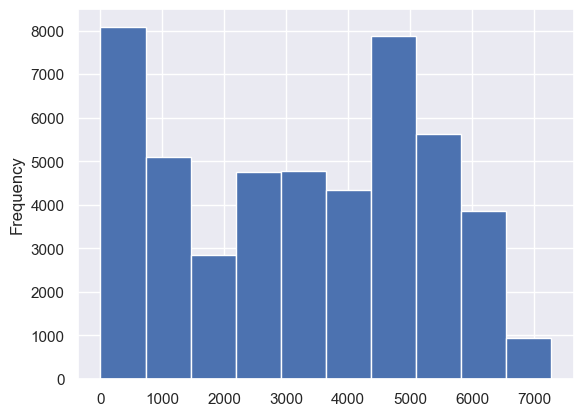

In [8]:
traffic["traffic_volume"].plot.hist()

In [9]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Most times of the day either have less than 1,000 cars per hour or about 5,000 cars per hour. About 25% of the time, there are 1,193 cars per hour. On the other end, there are 4,933 cars per hour about 75% of the time. 

### Traffic Volume: Day vs. Night

We need to establish a criterion to distinguish between nighttime and daytime. To start, we categorize hours of the day into the following:
- daytime: [7 AM to 7 PM)
- nighttime: [7 PM to 7 AM)

where the start time is inclusive and end time is exclusive

In [10]:
day = traffic.copy()[(traffic["date_time"].dt.hour >= 7) & (traffic["date_time"].dt.hour < 19)]
night = traffic.copy()[(traffic["date_time"].dt.hour < 7) | (traffic["date_time"].dt.hour >= 19)]

Text(0, 0.5, 'Frequency')

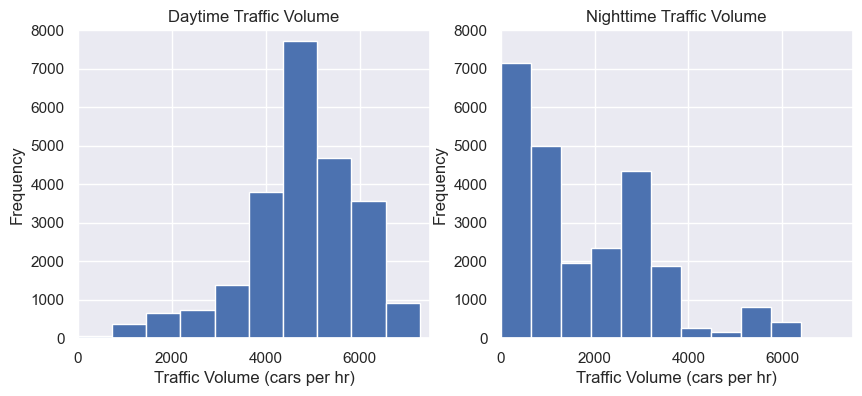

In [11]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.ylim(0, 8000)
plt.xlim(0, 7500)
plt.title("Daytime Traffic Volume")
plt.xlabel("Traffic Volume (cars per hr)")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.ylim(0, 8000)
plt.xlim(0, 7500)
plt.title("Nighttime Traffic Volume")
plt.xlabel("Traffic Volume (cars per hr)")
plt.ylabel("Frequency")

In [12]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

It appears that traffic volume during the daytime averages mostly between 4,000 and 6,000 cars, peaking at almost 8,000 which may likely be during rush hour. At nighttime, traffic volume averages between 0 and 4,000 cars, with most nighttime hours averaging less than 1,000 cars per hour. This means that traffic is light at night.

Because we are looking for heavy traffic indicators, we will analyze only the daytime subset of data.

## Day: Time Indicators

Text(0, 0.5, 'Traffic Volume')

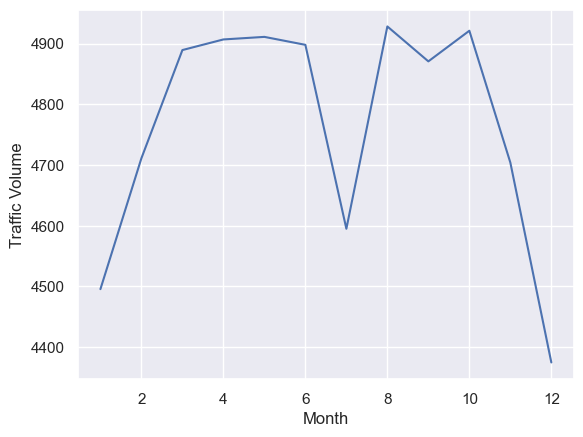

In [14]:
day["month"] = day["date_time"].dt.month
by_month = day.groupby("month").mean(numeric_only=True)
by_month["traffic_volume"].plot.line()
plt.xlabel("Month")
plt.ylabel("Traffic Volume")

It appears that traffic volume is lowest during cold months and highest during warm months except July. We want to explore this dip so we'll look at all years for the month of July.

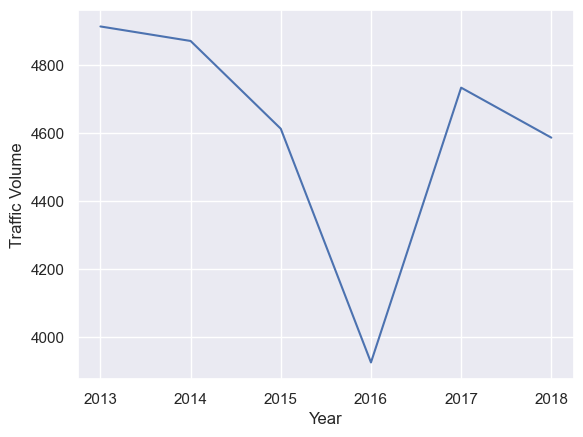

In [15]:
day["year"] = day["date_time"].dt.year
only_july = day[day["month"] == 7]
only_july.groupby("year").mean(numeric_only=True)["traffic_volume"].plot.line()
plt.xlabel("Year")
plt.ylabel("Traffic Volume")
plt.show()

There was a significant drop in traffic volume in 2016. This is most likely due to lane closures as with weekend construction impacting the I-94.<sup>[[2]](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696)
    
We can then generalize that traffic volume is higher for warm months and lower for cold months.

## Day: Time Indicators (II)

In [16]:
day["dayofweek"] = day["date_time"].dt.dayofweek
by_dayofweek = day.groupby("dayofweek").mean(numeric_only=True)
by_dayofweek["traffic_volume"]  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'Traffic Volume')

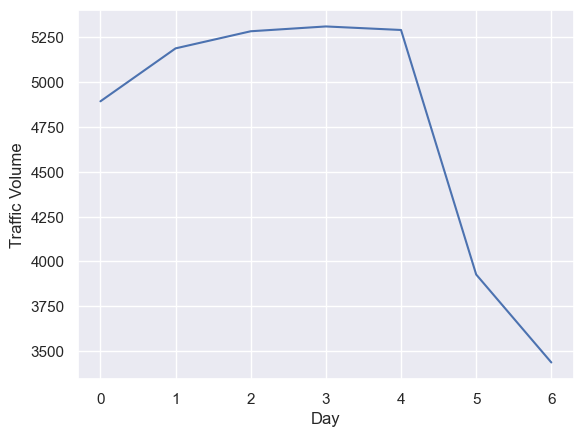

In [17]:
by_dayofweek["traffic_volume"].plot.line()
plt.xlabel("Day")
plt.ylabel("Traffic Volume")

The traffic volume is much higher on weekdays than weekends (Saturday = 5, Sunday = 6). This could be explained by the rush hours expected to and from work.

## Day: Time Indicators (III)

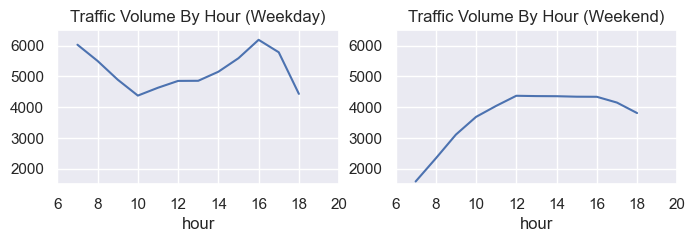

In [18]:
day["hour"] = day["date_time"].dt.hour
weekday = day.copy()[day["dayofweek"] <= 4] # 4 == Friday
weekend = day.copy()[day["dayofweek"] >= 5] # 5 == Saturday
by_hour_weekday = weekday.groupby("hour").mean(numeric_only=True)
by_hour_weekend = weekend.groupby("hour").mean(numeric_only=True)

plt.figure(figsize=(8,2))

plt.subplot(1,2,1)
by_hour_weekday["traffic_volume"].plot.line()
plt.xticks(range(0,21,2))
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour (Weekday)')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xticks(range(0,21,2))
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour (Weekend)')

plt.show()

For Monday through Friday, we can validate our claim that traffic volume is higher during rush hour, between 7-9 AM and between 3-5 PM. On weekends, traffic volume tends to be higher between 12-6 PM.

## Day: Weather Indicators

In [19]:
day.corr(numeric_only=True)["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature appears to have the highest correlation, out of all weather factors, with traffic volume.

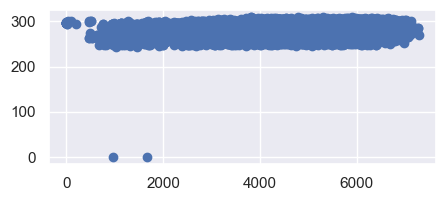

In [20]:
plt.figure(figsize=(5,2))
plt.scatter(day["traffic_volume"], day["temp"])

There are two erroneous temperature values. We resize the plot to remove these.

(230.0, 320.0)

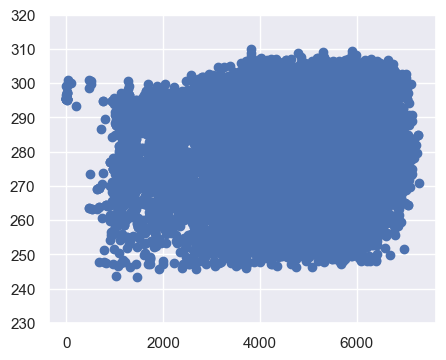

In [21]:
plt.figure(figsize=(5,4))
plt.scatter(day["traffic_volume"], day["temp"])
plt.ylim(230,320)

Temperature does not seem to be a significant indicator of heavy traffic.

In [22]:
day.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'month', 'year',
       'dayofweek', 'hour'],
      dtype='object')

## Day: Weather Types

There are a couple of quantitative weather columns we can explore, namely `weather_main` and `weather_description`.

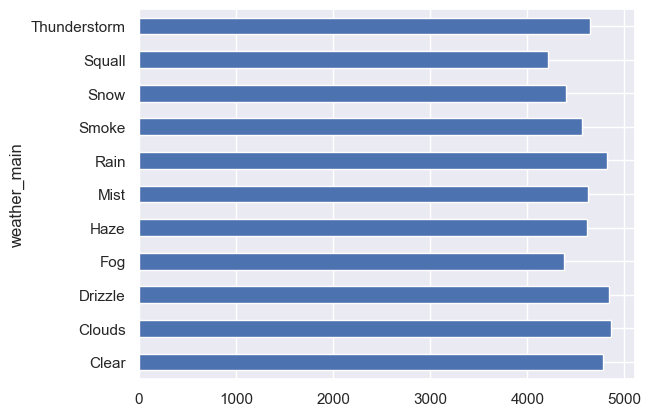

In [23]:
by_weather_main = day.groupby("weather_main").mean(numeric_only=True)
by_weather_main["traffic_volume"].plot.barh()
plt.show()

There does not seem to be a correlation between weather condition and traffic volume.

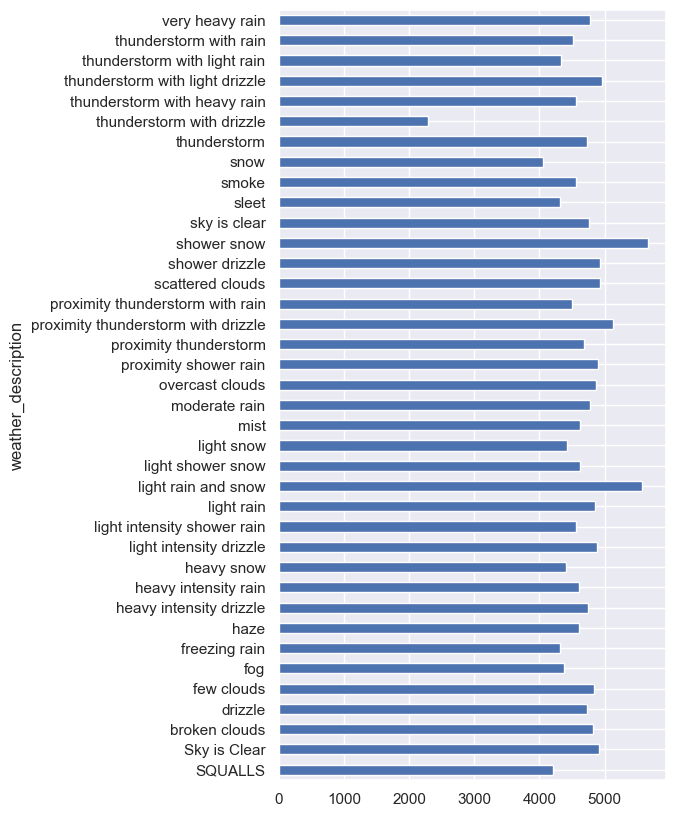

In [24]:
by_weather_description = day.groupby("weather_description").mean(numeric_only=True)
by_weather_description["traffic_volume"].plot.barh(figsize=(5,10))
plt.show()

There are a few detailed weather conditions that produced traffic volume higher than that of clear skies. The most impactful ones are `shower snow`, `light rain and snow`, and `proximity thunderstorm with drizzle` which produced average traffic volumes higher than 5,000 cars per hour. It is unclear why traffic volume may be higher during these conditions. Possibly, the conditions aren't severe enough to keep someone from driving but the low visibility may mean lower driving speeds.

## Conclusion

Two indicators of heavy traffic are time and weather.

- Time
    - Traffic volume is higher during the day between 7 AM and 7 PM, averaging about 4,000-6,000 cars per hour. 
    - It is lower during cold months (November through February) and higher during warm months (March through October). 
    - Most likely due to scheduled activities like work or school, traffic is higher during the weekdays rather than the weekends.
- Weather
    - Traffic volume higher during the following weather conditions:
        - Shower snow
        - Light rain and snow
        - Proximity thunderstorm with drizzle